In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [128]:
# importing the dataset using dask
data = pd.read_csv(r'C:\Users\rutur\Downloads\transaction-fraud-detection-main\transaction-fraud-detection-main\data\raw\Fraud.csv')

print(data.shape)
data.head()

(636262, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0


In [75]:
data.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
629507,7,PAYMENT,31884.76,C1299313227,0.00,0.00,M511913593,0.00,0.00,0,0
609554,400,CASH_OUT,103039.54,C1676208042,0.00,0.00,C1824999049,320933.30,423972.84,0,0
636096,153,TRANSFER,624355.80,C995334436,0.00,0.00,C1747323931,1752629.60,2376985.40,0,0
120295,397,CASH_IN,338400.95,C1982606899,31048.00,369448.95,C503213103,230936.84,0.00,0,0
576312,303,PAYMENT,32186.40,C1724175473,0.00,0.00,M1167246231,0.00,0.00,0,0
582158,153,PAYMENT,17340.22,C304900583,0.00,0.00,M875249650,0.00,0.00,0,0
194770,348,CASH_OUT,28250.30,C742075837,0.00,0.00,C1925068348,1724355.85,1752606.15,0,0
391267,230,CASH_OUT,321121.46,C219493934,46571.00,0.00,C679061258,0.00,321121.46,0,0
380516,352,PAYMENT,4394.28,C1216590573,138439.00,134044.72,M1191982090,0.00,0.00,0,0
13892,257,CASH_IN,135395.89,C726397028,30441.00,165836.89,C232528284,1358438.30,1223042.41,0,0


In [76]:
# getting the information related to data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 53.4+ MB


In [77]:
data.type.value_counts()

type
CASH_OUT    224216
PAYMENT     214968
CASH_IN     139614
TRANSFER     53294
DEBIT         4170
Name: count, dtype: int64

In [78]:
#describing the data

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,636262.000000,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,636262.000000,636262.000000
mean,242.931935,1.800585e+05,8.317937e+05,8.528354e+05,1.096212e+06,1.221809e+06,0.001290,0.000003
std,142.330857,6.069714e+05,2.885636e+06,2.921296e+06,3.375389e+06,3.656213e+06,0.035898,0.001773
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,155.000000,1.340742e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,238.000000,7.481577e+04,1.423900e+04,0.000000e+00,1.315397e+05,2.147127e+05,0.000000,0.000000
75%,334.000000,2.084988e+05,1.072998e+05,1.435652e+05,9.384820e+05,1.109230e+06,0.000000,0.000000
max,742.000000,5.722962e+07,4.368662e+07,4.367380e+07,3.551855e+08,3.555534e+08,1.000000,1.000000


In [129]:
#checking how many frauds are there

data['isFraud'].value_counts()

isFraud
0    635441
1       821
Name: count, dtype: int64

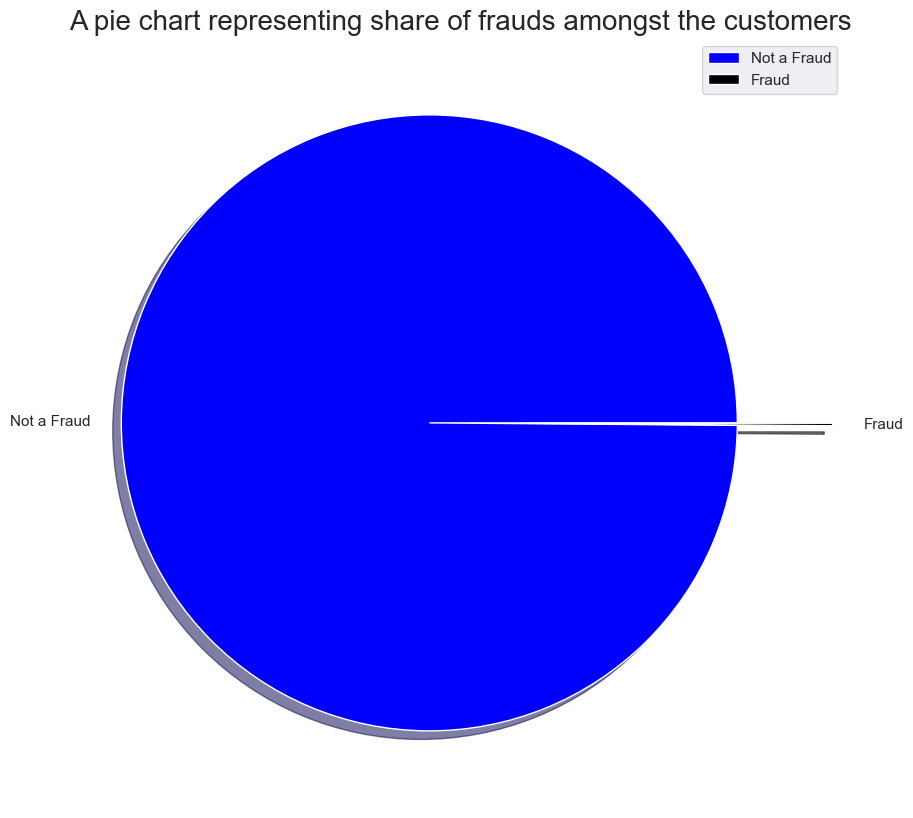

In [80]:
labels = ['Not a Fraud', 'Fraud']
colors = ['blue', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True,)
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

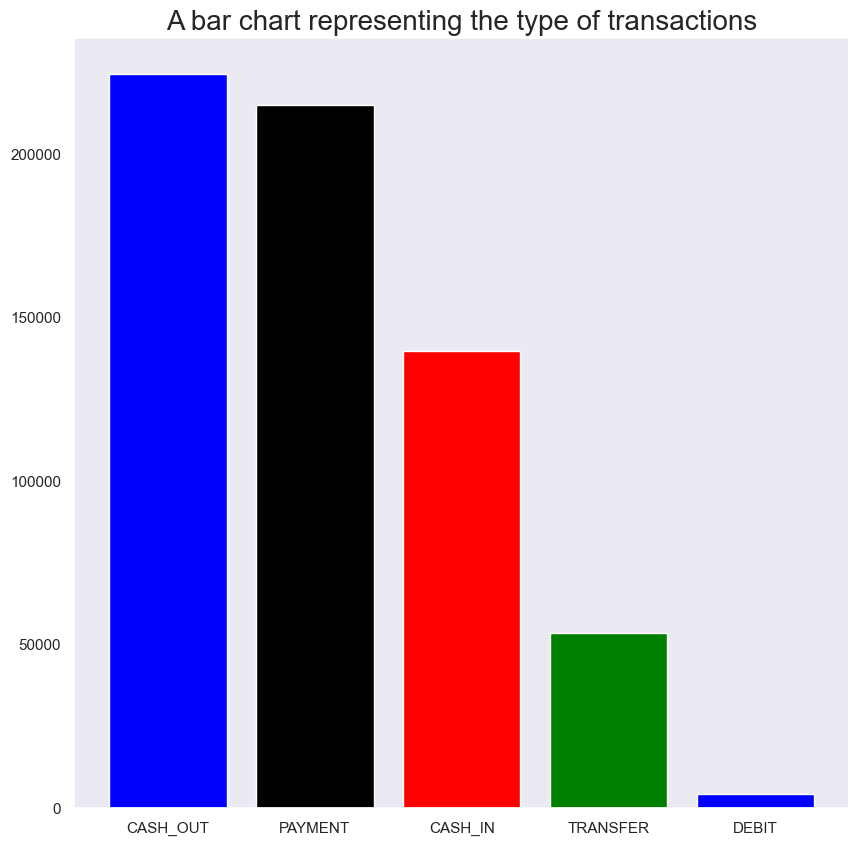

In [122]:
type = data['type'].value_counts()
transaction = type.index
quantity = type.values

plt.rcParams['figure.figsize'] = (10, 10)
plt.bar(transaction, quantity, color = ['blue', 'black', 'red', 'green'])
plt.title('A bar chart representing the type of transactions', fontsize = 20)
plt.show()

In [123]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,3,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,No Fraud,0
1,132,1,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,No Fraud,0
2,355,5,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,No Fraud,0
3,135,1,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,No Fraud,0
4,381,1,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,No Fraud,0


In [82]:
data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    636260
1         2
Name: count, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [131]:
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9994027645713657

In [140]:
features = np.array([[4, 4000, 4000, 0.0]])
print(model.predict(features))

['Fraud']
